# week3 授業課題
## 信用情報の分析

kaggleの Home Credit Default Riskコンペティションを題材に実データを扱う訓練を行う。

### ◇Home Creditについて

Home Creditは1997年に設立され、現在９カ国で国際的な消費者金融サービスを展開している。サービスは、とりわけ貸付経歴がほとんどないか、全くない人を対象に、責任ある貸付を行う事に焦点を置いている。

### ◇コンペの目的

返済能力のある顧客が無事借入できるよう、そして顧客がより確実に返済完了できるような借入額、完済日、返済スケジュールを提供できるよう、データに裏付けられた予測を行う事が目的。

### ◇企業が得られるメリット

- 返済能力のある顧客を効率的かつ迅速に見分けるための一助となる
- 不良債権のリスク低減

## データの把握

application_train.csvの中身について概観する。

In [1]:
import pandas as pd
pd.set_option("display.max_columns", 200)
train = pd.read_csv('../home-credit-default-risk/application_train.csv')
df = pd.DataFrame(train)
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

先頭１０行の情報から、中身はint,str入り混ざっており、欠損もかなり多そうである。

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


infoの情報から、データ数は30万超、特徴量は122とかなり膨大なデータベースだという事がわかる。

In [3]:
pd.set_option("display.max_columns", 200)
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [4]:
df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

今回のターゲット変数は０、１の２種であり、数について１０倍の開きがある。

AxesSubplot(0.125,0.125;0.775x0.755)


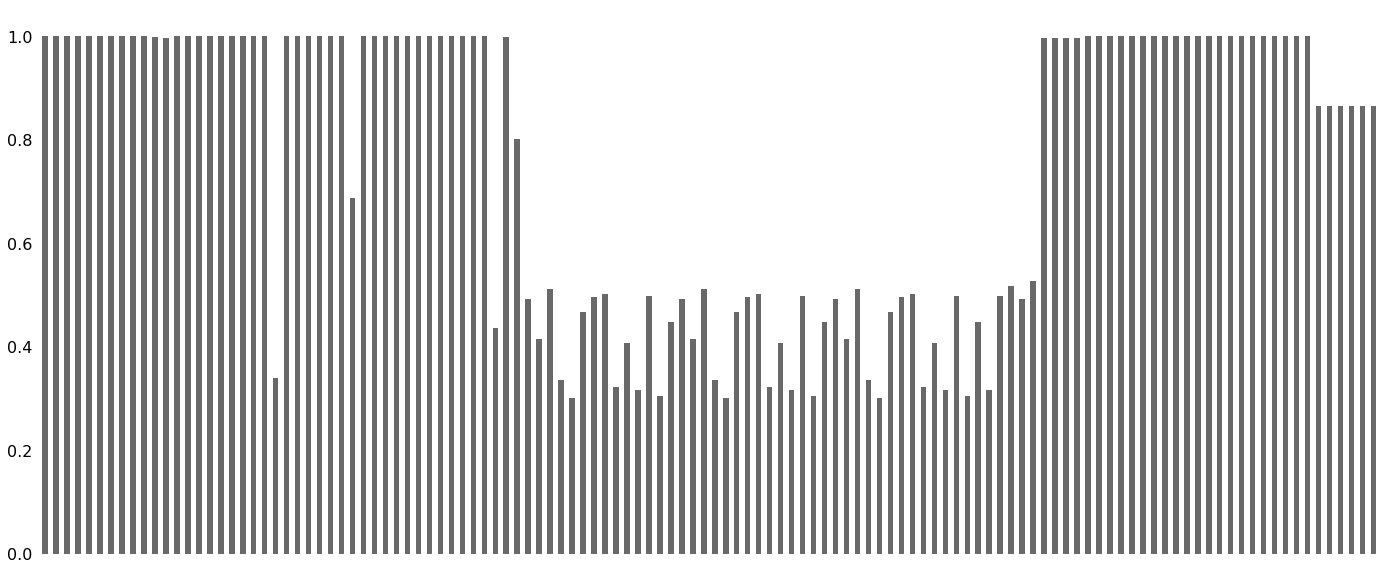

In [5]:
#欠損値の確認

import missingno as msno
%matplotlib inline
bar = msno.bar(df)
print(bar)

欠損は中央付近の列に多いようである。

In [6]:
#クラスごとデータの確認

df.iloc[:][df.TARGET==1].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,NaN,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.548477,0.190706,0.0165,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0265,NaN,0.0094,NaN,0.0000,0.0168,0.0092,0.9732,NaN,NaN,0.0000,0.0690,0.0417,NaN,0.0271,NaN,0.0083,NaN,0.0000,0.0167,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0270,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0085,Wooden,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.306841,0.320163,0.1309,0.1250,0.9960,0.9456,0.0822,0.16,0.1379,0.2500,0.2917,0.0142,0.1059,0.1267,0.0039,0.0078,0.1334,0.1297,0.9960,0

In [7]:
df.iloc[:][df.TARGET==0].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,0.2917,0.3333,0.013,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash l

In [8]:
#クラスごとのデータ数をグラフ化

import matplotlib.pyplot as plt
%matplotlib inline

#class_num = []
a = df.iloc[:][df.TARGET==1]
result1 = len(df.iloc[:][df.TARGET==1])

In [9]:
result2 = len(df.iloc[:][df.TARGET==0])

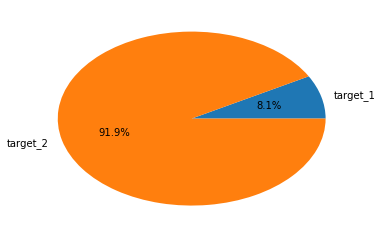

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

columns = df.columns
sample_list = []

plt.pie((result1, result2), labels=('target_1', 'target_2'), autopct="%1.1f%%")
plt.show()

## 仮説と検証（データ探索）

以下、実際にデータを操作しながらターゲット変数に相関がありそうなものを探っていく。

なお、データ全体の相関行列を求めたが、ターゲット変数と相関がありそうな特徴量が見つからなかったため、ラベルごとにデータを分け、違いがあるかどうか把握することを中心にしている。

探索のメニューは以下である。

1. 相関係数の確認

2. ある特徴量について、ターゲット変数０と１でデータのばらつきに違いはあるか
 - AMT_INCOME_TOTAL 収入総額
 - AMT_CREDIT　ローンの金額
 - OWN_CAR_AGE　所有車の年数
 - AMT_ANNUITY　ローン年金
 - CNT_CHILDREN　子供の人数
 - CNT_FAM_MEMBERS　家族数
 - DAYS_EMPLOYED　雇用期間
 - DAYS_BIRTH　顧客の年齢
 - HOUR_APPR_PROCESS_START　相談開始時間
 - EXT_SOURCE_1  外部データベースの数値

3. 特徴量同士の散布図
 - OWN_CAR_AGEとDAYS_BIRTH
 - DAYS_BIRTHとEXT_SOURCE_1
 - (OWN_CAR_AGE * DAYS_BIRTH)とEXT_SOURCE_1

In [11]:
#相関係数の確認
df.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,-0.000973,-0.000384,0.001818,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.002895,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.000082,0.002342,0.000222,0.001556,-0.002070,0.001551,0.005900,-0.001463,0.004862,-0.002879,0.004851,0.003083,0.001465,0.003119,0.001770,-0.002575,0.003042,0.001961,-0.001411,0.001890,0.005245,-0.001058,0.005017,-0.002844,0.004386,0.002081,0.001548,0.003589,0.002156,-0.001923,0.001920,0.001988,-0.001647,0.001366,0.005777,-0.001036,0.005067,-0.002583,0.004588,0.002837,0.001699,0.003272,0.002205,-0.003020,0.002440,0.002288,-0.001409,-0.000082,-0.001423,0.001187,-0.000858,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-0.000815,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,0.041975,0.051457,0.037612,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.009308,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.155317,-0.160472,-0.178919,-0.029498,-0.022746,-0.009728,-0.022149,-0.018550,-0.034199,-0.019172,-0.044003,-0.033614,-0.010885,-0.025031,-0.032997,-0.003176,-0.013578,-0.027284,-0.019952,-0.009036,-0.022068,-0.016340,-0.032131,-0.017387,-0.043226,-0.032698,-0.010174,-0.023393,-0.030685,-0.001557,-0.012711,-0.029184,-0.022081,-0.009993,-0.022326,-0.018573,-0.033863,-0.019025,-0.043768,-0.033394,-0.011256,-0.024621,-0.032739,-0.002757,-0.013337,-0.032596,0.009131,0.032248,0.009022,0.031276,0.055218,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.0000

In [12]:
df.corr()["TARGET"].sort_values(ascending=False)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709


相関行列について、TARGETと各特徴量の相関は最も高いものでも0.078239と、有意な値とならない。

### ある特徴量について、ターゲット変数０と１でデータのばらつきに違いはあるか

ターゲット変数でグルーピングを行い、特徴量の分散を見てみる。


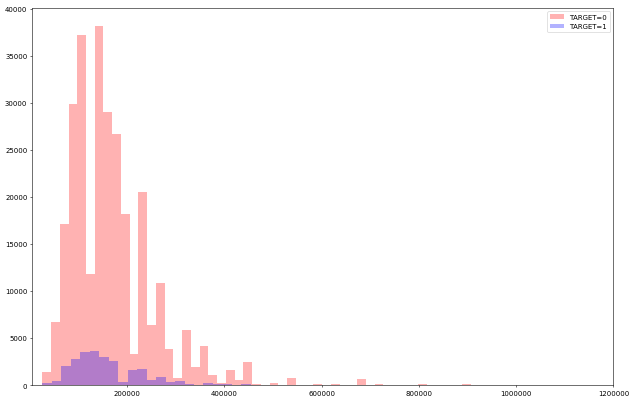

＜TARGET=0＞
count    2.826860e+05
mean     1.690777e+05
std      1.104763e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64
------------------------------------------
＜TARGET=1＞
count    2.482500e+04
mean     1.656118e+05
std      7.466770e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


In [82]:
#AMT_INCOME_TOTAL
name = "AMT_INCOME_TOTAL"
plt.figure(figsize=(15,10), dpi=50)
plt.hist(df.iloc[:][df.TARGET == 0][name], bins=1000, color='r', alpha=0.3, label="TARGET=0")
plt.hist(df.iloc[:][df.TARGET == 1][name], bins=6000, color='b', alpha=0.3, label="TARGET=1")
plt.xlim([5000,1200000])
plt.legend()
plt.show()

print("＜TARGET=0＞")
print(df.iloc[:][df.TARGET == 0][name].describe())
print("------------------------------------------")
print("＜TARGET=1＞")
print(df.iloc[:][df.TARGET == 1][name].describe())

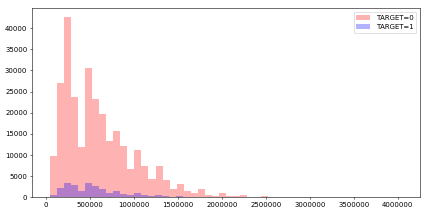

＜TARGET=0＞
count    2.826860e+05
mean     6.026483e+05
std      4.068459e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.177880e+05
75%      8.100000e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64
------------------------------------------
＜TARGET=1＞
count    2.482500e+04
mean     5.577785e+05
std      3.464332e+05
min      4.500000e+04
25%      2.844000e+05
50%      4.975200e+05
75%      7.333155e+05
max      4.027680e+06
Name: AMT_CREDIT, dtype: float64


In [84]:
#AMT_CREDITのばらつきぐあい
plt.figure(figsize=(10,5), dpi=50)
plt.hist(df.iloc[:][df.TARGET == 0]["AMT_CREDIT"], bins=50, color='r', alpha=0.3, label="TARGET=0")
plt.hist(df.iloc[:][df.TARGET == 1]["AMT_CREDIT"], bins=50, color='b', alpha=0.3, label="TARGET=1")
plt.legend()
plt.show()

print("＜TARGET=0＞")
print(df.iloc[:][df.TARGET == 0]["AMT_CREDIT"].describe())
print("------------------------------------------")
print("＜TARGET=1＞")
print(df.iloc[:][df.TARGET == 1]["AMT_CREDIT"].describe())

### ローンの借入額

- TARGET0の顧客の方が、TARGET1の顧客よりやや金額が高い傾向。
- 信用力の高い人ほど多く借りられる可能性

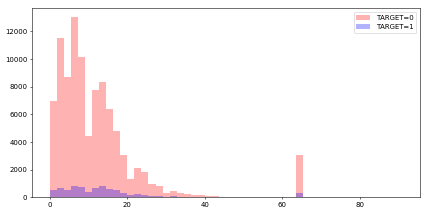

＜TARGET=0＞
count    97006.000000
mean        11.935540
std         11.891359
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         91.000000
Name: OWN_CAR_AGE, dtype: float64
------------------------------------------
＜TARGET=1＞
count    7576.000000
mean       13.668691
std        12.499074
min         0.000000
25%         6.000000
50%        11.000000
75%        17.000000
max        91.000000
Name: OWN_CAR_AGE, dtype: float64


In [85]:
#OWN_CAR_AGEのばらつき

df_car_dropped = df.dropna(subset=['OWN_CAR_AGE'])  #欠損行を削除

name = "OWN_CAR_AGE"
plt.figure(figsize=(10,5), dpi=50)
plt.hist(df_car_dropped.iloc[:][df_car_dropped.TARGET == 0][name], bins=50, color='r', alpha=0.3, label="TARGET=0")
plt.hist(df_car_dropped.iloc[:][df_car_dropped.TARGET == 1][name], bins=50, color='b', alpha=0.3, label="TARGET=1")
plt.legend()
plt.show()

print("＜TARGET=0＞")
print(df_car_dropped.iloc[:][df_car_dropped.TARGET == 0]["OWN_CAR_AGE"].describe())
print("------------------------------------------")
print("＜TARGET=1＞")
print(df_car_dropped.iloc[:][df_car_dropped.TARGET == 1]["OWN_CAR_AGE"].describe())


### 所有車の年数

- TARGET0の顧客の方が新しい車を保有している傾向

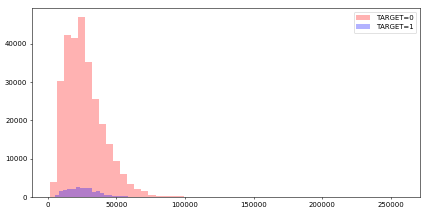

＜TARGET=0＞
count    282674.000000
mean      27163.623349
std       14658.307178
min        1615.500000
25%       16456.500000
50%       24876.000000
75%       34749.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
------------------------------------------
＜TARGET=1＞
count     24825.000000
mean      26481.744290
std       12450.676999
min        2722.500000
25%       17361.000000
50%       25263.000000
75%       32976.000000
max      149211.000000
Name: AMT_ANNUITY, dtype: float64


In [86]:
#AMT_ANNUITY
df_ann_dropped = df.dropna(subset=['AMT_ANNUITY'])  #欠損行を削除

name = "AMT_ANNUITY"
plt.figure(figsize=(10,5), dpi=50)
plt.hist(df_ann_dropped.iloc[:][df_ann_dropped.TARGET == 0][name], bins=50, color='r', alpha=0.3, label="TARGET=0")
plt.hist(df_ann_dropped.iloc[:][df_ann_dropped.TARGET == 1][name], bins=50, color='b', alpha=0.3, label="TARGET=1")
plt.legend()
plt.show()

print("＜TARGET=0＞")
print(df_ann_dropped.iloc[:][df_ann_dropped.TARGET == 0]["AMT_ANNUITY"].describe())
print("------------------------------------------")
print("＜TARGET=1＞")
print(df_ann_dropped.iloc[:][df_ann_dropped.TARGET == 1]["AMT_ANNUITY"].describe())


### ローン年金の額
- ローン年金の額もTARGET0がやや多い傾向

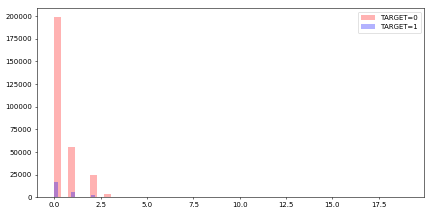

＜TARGET=0＞
count    282686.000000
mean          0.412946
std           0.718843
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
------------------------------------------
＜TARGET=1＞
count    24825.000000
mean         0.463807
std          0.756903
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         11.000000
Name: CNT_CHILDREN, dtype: float64


In [89]:
#CNT_CHILDREN
plt.figure(figsize=(10,5), dpi=50)
plt.hist(df.iloc[:][df.TARGET == 0]["CNT_CHILDREN"], bins=50, color='r', alpha=0.3, label="TARGET=0")
plt.hist(df.iloc[:][df.TARGET == 1]["CNT_CHILDREN"], bins=50, color='b', alpha=0.3, label="TARGET=1")
plt.legend()
plt.show()

print("＜TARGET=0＞")
print(df.iloc[:][df.TARGET == 0]["CNT_CHILDREN"].describe())
print("------------------------------------------")
print("＜TARGET=1＞")
print(df.iloc[:][df.TARGET == 1]["CNT_CHILDREN"].describe())


### 子供の数
- ほとんど変わらないが、TARGET1の方が僅かに多い傾向

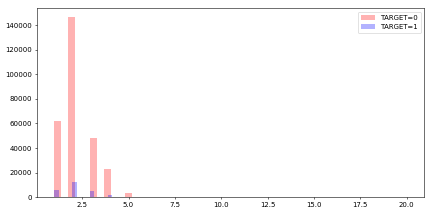

＜TARGET=0＞
count    282684.000000
mean          2.150154
std           0.906984
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64
------------------------------------------
＜TARGET=1＞
count    24825.000000
mean         2.181269
std          0.951327
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: CNT_FAM_MEMBERS, dtype: float64


In [90]:
#CNT_FAM_MEMBERS

df_fam_dropped = df.dropna(subset=['CNT_FAM_MEMBERS'])  #欠損行を削除

name = "CNT_FAM_MEMBERS"
plt.figure(figsize=(10,5), dpi=50)
plt.hist(df_fam_dropped.iloc[:][df_fam_dropped.TARGET == 0][name], bins=50, color='r', alpha=0.3, label="TARGET=0")
plt.hist(df_fam_dropped.iloc[:][df_fam_dropped.TARGET == 1][name], bins=50, color='b', alpha=0.3, label="TARGET=1")
plt.legend()
plt.show()

print("＜TARGET=0＞")
print(df_fam_dropped.iloc[:][df_fam_dropped.TARGET == 0][name].describe())
print("------------------------------------------")
print("＜TARGET=1＞")
print(df_fam_dropped.iloc[:][df_fam_dropped.TARGET == 1][name].describe())


### 家族の数
- これも子供の数と傾向が同じである。ほとんど変わらないが、TARGET1の方が僅かに多い。

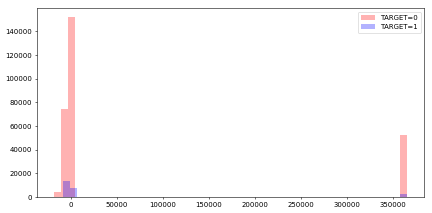

＜TARGET=０＞
count    282686.000000
mean      65696.146123
std      142877.810161
min      -17912.000000
25%       -2813.000000
50%       -1235.000000
75%        -278.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64
------------------------------------------
＜TARGET=1＞
count     24825.000000
mean      42394.675448
std      119484.634253
min      -16069.000000
25%       -2156.000000
50%       -1034.000000
75%        -379.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


In [91]:
#DAYS_EMPLOYED
name = "DAYS_EMPLOYED"
plt.figure(figsize=(10,5), dpi=50)
plt.hist(df.iloc[:][df.TARGET == 0][name], bins=50, color='r', alpha=0.3, label="TARGET=0")
plt.hist(df.iloc[:][df.TARGET == 1][name], bins=50, color='b', alpha=0.3, label="TARGET=1")
plt.legend()
plt.show()
print("＜TARGET=０＞")
print(df.iloc[:][df.TARGET == 0][name].describe())
print("------------------------------------------")
print("＜TARGET=1＞")
print(df.iloc[:][df.TARGET == 1][name].describe())


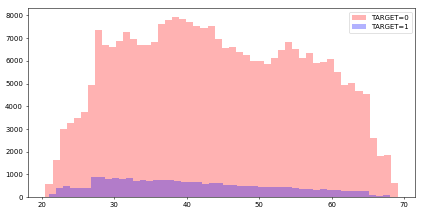

＜TARGET=0＞
count    282686.000000
mean         44.214182
std          11.956715
min          20.517808
25%          34.345205
50%          43.498630
75%          54.229452
max          69.120548
Name: DAYS_BIRTH, dtype: float64
------------------------------------------
＜TARGET=1＞
count    24825.000000
mean        40.780351
std         11.487245
min         21.035616
25%         31.221918
50%         39.128767
75%         49.416438
max         68.953425
Name: DAYS_BIRTH, dtype: float64


In [92]:
name = "DAYS_BIRTH"
plt.figure(figsize=(10,5), dpi=50)
plt.hist(df.iloc[:][df.TARGET == 0][name]/-365, bins=50, color='r', alpha=0.3, label="TARGET=0")
plt.hist(df.iloc[:][df.TARGET == 1][name]/-365, bins=50, color='b', alpha=0.3, label="TARGET=1")
plt.legend()
plt.show()

birth0 = df.query("TARGET == 0").DAYS_BIRTH / -365
birth1 = df.query("TARGET == 1").DAYS_BIRTH / -365
print("＜TARGET=0＞")
print(birth0.describe())
print("------------------------------------------")
print("＜TARGET=1＞")
print(birth1.describe())


### 顧客の年齢
- 顧客の年齢は違いが比較的わかりやすい。ばらつきはそれほど変わらないが、TARGET1の方が若年層寄りである。

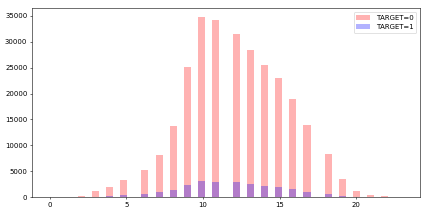

＜TARGET=0＞
count    282686.000000
mean         12.086807
std           3.263173
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64
------------------------------------------
＜TARGET=1＞
count    24825.000000
mean        11.797100
std          3.284299
min          0.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


In [93]:
#HOUR_APPR_PROCESS_START
name = "HOUR_APPR_PROCESS_START"
plt.figure(figsize=(10,5), dpi=50)
plt.hist(df.iloc[:][df.TARGET == 0][name], bins=50, color='r', alpha=0.3, label="TARGET=0")
plt.hist(df.iloc[:][df.TARGET == 1][name], bins=50, color='b', alpha=0.3, label="TARGET=1")
plt.legend()
plt.show()
print("＜TARGET=0＞")
print(df.iloc[:][df.TARGET == 0][name].describe())
print("------------------------------------------")
print("＜TARGET=1＞")
print(df.iloc[:][df.TARGET == 1][name].describe())

### 相談開始時間

- ほとんど変わりはない。TARGET1の方が平均で20分ぐらい早い。

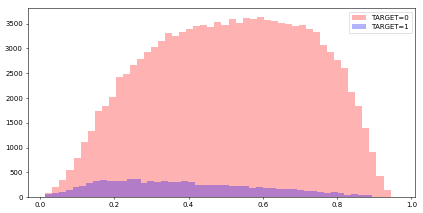

＜TARGET=0＞
count    124079.000000
mean          0.511461
std           0.208804
min           0.014568
25%           0.345430
50%           0.517452
75%           0.682839
max           0.962693
Name: EXT_SOURCE_1, dtype: float64
------------------------------------------
＜TARGET=1＞
count    10054.000000
mean         0.386968
std          0.204729
min          0.014691
25%          0.221847
50%          0.361675
75%          0.537508
max          0.929394
Name: EXT_SOURCE_1, dtype: float64


In [96]:
#EXT_SOURCE_1
df_ext1_dropped = df.dropna(subset=['EXT_SOURCE_1'])  #欠損行を削除

name = "EXT_SOURCE_1"

plt.figure(figsize=(10,5), dpi=50)
plt.hist(df_ext1_dropped.iloc[:][df_ext1_dropped.TARGET == 0][name], bins=50, color='r', alpha=0.3, label="TARGET=0")
plt.hist(df_ext1_dropped.iloc[:][df_ext1_dropped.TARGET == 1][name], bins=50, color='b', alpha=0.3, label="TARGET=1")
plt.legend()
plt.show()

print("＜TARGET=0＞")
print(df_ext1_dropped.iloc[:][df_ext1_dropped.TARGET == 0][name].describe())
print("------------------------------------------")
print("＜TARGET=1＞")
print(df_ext1_dropped.iloc[:][df_ext1_dropped.TARGET == 1][name].describe())

### 外部ソース１

カーネル（＊）によると、EXT_SOURCE_1の特徴量が最も重要とのことだったが、確かに平均値において差が確認できる。

＊https://www.kaggle.com/osciiart/homecreditrisk-extensive-eda-baseline-model-jp

## 特徴量同士の散布図

続いて、ターゲットと相関の高そうな特徴量同士の散布図を、ラベルを分けて作成してみる。

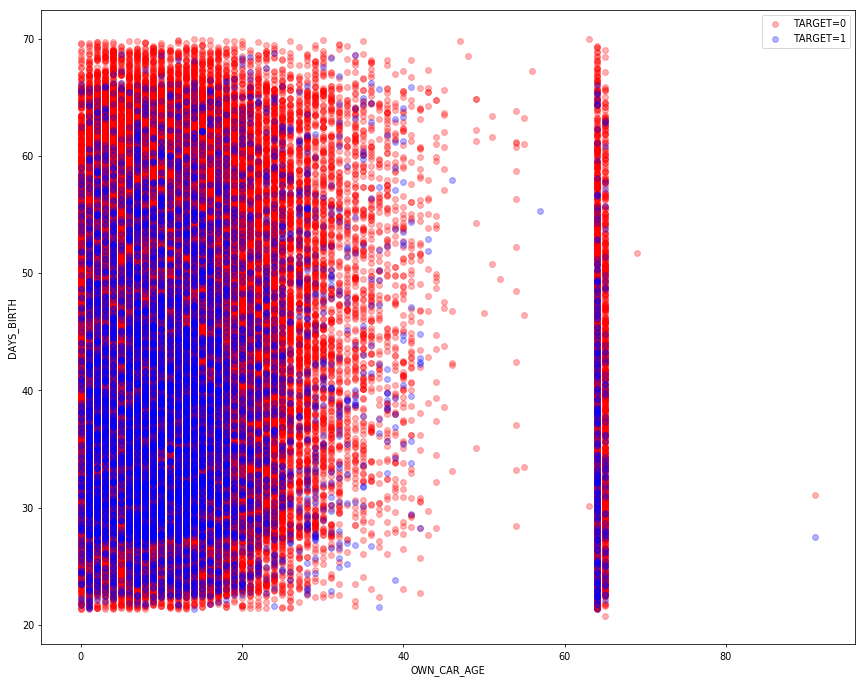

In [106]:
#OWN_CAR_AGEとDAYS_BIRTH
df_car_dropped = df.dropna(subset=['OWN_CAR_AGE'])  #欠損行を削除

name1 = "OWN_CAR_AGE"
name2 = "DAYS_BIRTH"
plt.figure(figsize=(15,12), dpi=70)
plt.scatter(df_car_dropped.iloc[:][df_car_dropped.TARGET == 0][name1],
            df_car_dropped.iloc[:][df_car_dropped.TARGET == 0][name2]/-360,
            color='r', alpha=0.3, label="TARGET=0")
plt.scatter(df_car_dropped.iloc[:][df_car_dropped.TARGET == 1][name1],
            df_car_dropped.iloc[:][df_car_dropped.TARGET == 1][name2]/-360,
            color='b', alpha=0.3, label="TARGET=1")
plt.xlabel(name1)
plt.ylabel(name2)
plt.legend()
plt.show()

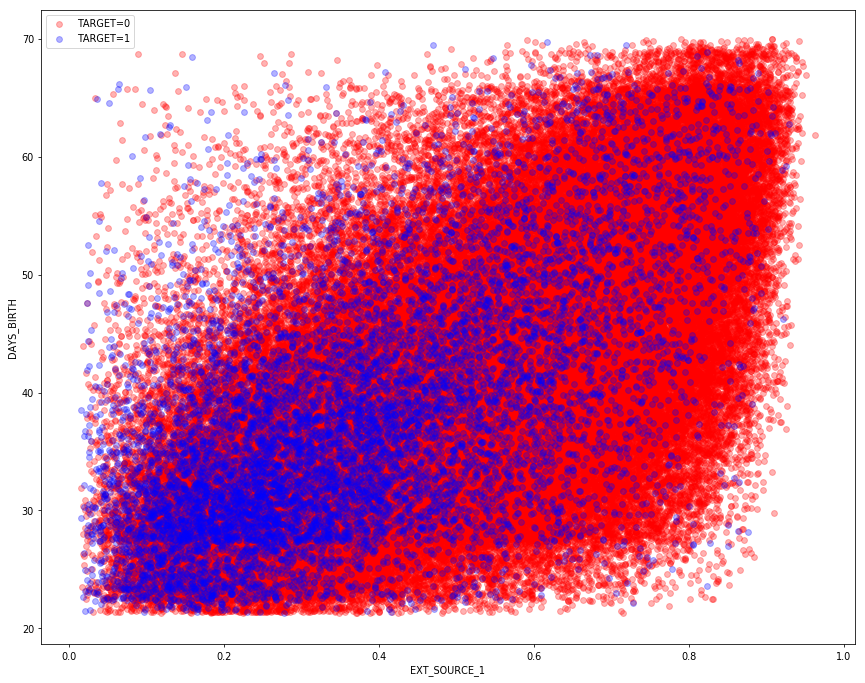

In [107]:
#DAYS_BIRTHとEXT_SOURCE_1
df_ext1_dropped = df.dropna(subset=['EXT_SOURCE_1'])  #欠損行を削除

name1 = "EXT_SOURCE_1"
name2 = "DAYS_BIRTH"
plt.figure(figsize=(15,12), dpi=70)
plt.scatter(df_ext1_dropped.iloc[:][df_ext1_dropped.TARGET == 0][name1],
            df_ext1_dropped.iloc[:][df_ext1_dropped.TARGET == 0][name2]/-360,
            color='r', alpha=0.3, label="TARGET=0")
plt.scatter(df_ext1_dropped.iloc[:][df_ext1_dropped.TARGET == 1][name1],
            df_ext1_dropped.iloc[:][df_ext1_dropped.TARGET == 1][name2]/-360,
            color='b', alpha=0.3, label="TARGET=1")
plt.xlabel(name1)
plt.ylabel(name2)
plt.legend()
plt.show()

いずれも、集中のポイントが異なる気がするが、さすがに綺麗に分かれてくれるわけではない。

そこで、OWN_CAR_AGEとDAYS_BIRTHを掛け合わせた値を新たに作成し、EXT_SOURCE_1と比較してみることにする。

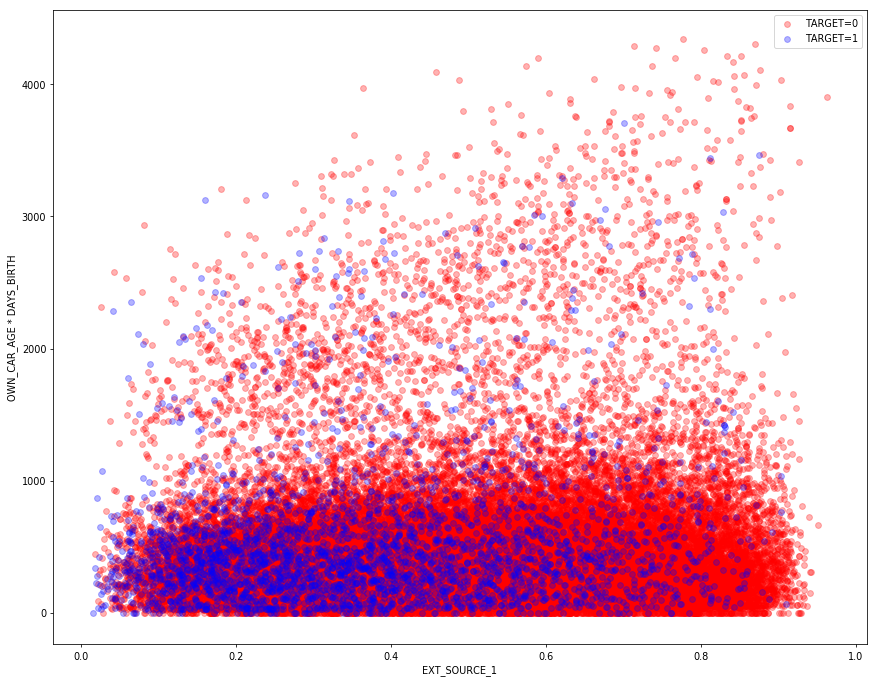

In [117]:
#OWN_CAR_AGEとDAYS_BIRTHを掛け合わせる

df_CE_dropped = df_car_dropped.dropna(subset=['EXT_SOURCE_1'])  #欠損値処理
df_CE_dropped = df_CE_dropped.reset_index(drop=True)

Car_Birth_0 = (df_CE_dropped.iloc[:][df_CE_dropped.TARGET == 0]["OWN_CAR_AGE"]
               * (df_CE_dropped.iloc[:][df_CE_dropped.TARGET == 0]["DAYS_BIRTH"]/-365))

Car_Birth_1 = (df_CE_dropped.iloc[:][df_CE_dropped.TARGET == 1]["OWN_CAR_AGE"]
               * (df_CE_dropped.iloc[:][df_CE_dropped.TARGET == 1]["DAYS_BIRTH"]/-365))


name1 = "EXT_SOURCE_1"
plt.figure(figsize=(15,12), dpi=70)
plt.scatter(df_CE_dropped.iloc[:][df_CE_dropped.TARGET == 0][name1],
            Car_Birth_0,
            color='r', alpha=0.3, label="TARGET=0")
plt.scatter(df_CE_dropped.iloc[:][df_CE_dropped.TARGET == 1][name1],
            Car_Birth_1,
            color='b', alpha=0.3, label="TARGET=1")
plt.xlabel(name1)
plt.ylabel("OWN_CAR_AGE * DAYS_BIRTH")
plt.legend()
plt.show()

やはりあまり変わらないので、対数変換を利用してみる

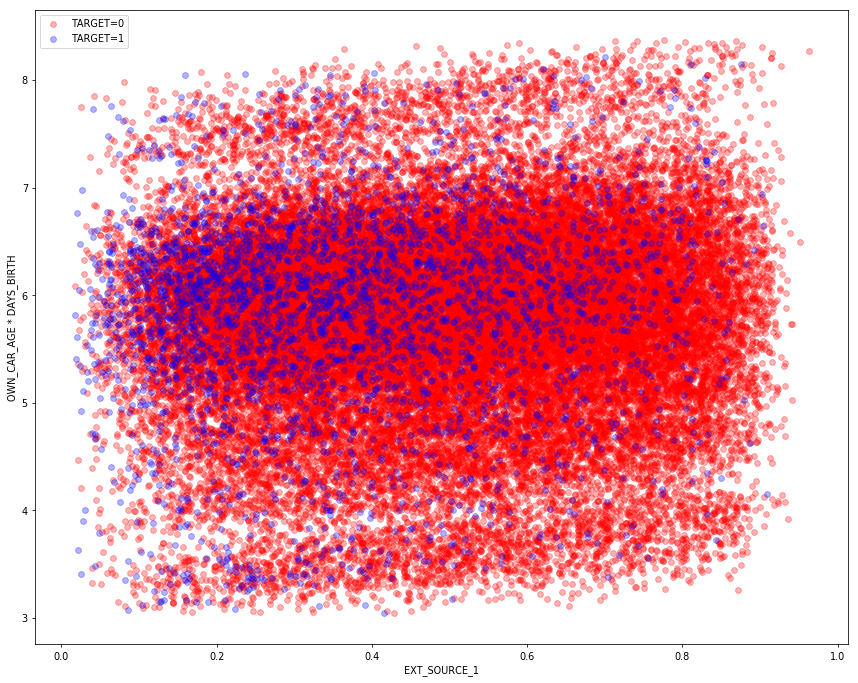

In [119]:
import numpy as np

Car_Birth_0 = Car_Birth_0.apply(np.log)
Car_Birth_1 = Car_Birth_1.apply(np.log)

name1 = "EXT_SOURCE_1"
plt.figure(figsize=(15,12), dpi=70)
plt.scatter(df_CE_dropped.iloc[:][df_CE_dropped.TARGET == 0][name1],
            Car_Birth_0,
            color='r', alpha=0.3, label="TARGET=0")
plt.scatter(df_CE_dropped.iloc[:][df_CE_dropped.TARGET == 1][name1],
            Car_Birth_1,
            color='b', alpha=0.3, label="TARGET=1")
plt.xlabel(name1)
plt.ylabel("OWN_CAR_AGE * DAYS_BIRTH")
plt.legend()
plt.show()

### 【今のところの結論】

application_train.csvのデータのみだと、多少有意な値は得られそうなものの、精度において限界がありそうである